In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style()

from pymutspec.annotation import rev_comp

## Read data

### Verterbata

In [2]:
path_to_data = "../data/MutSpecVertebratescytb.csv"
mutspec = pd.read_csv(path_to_data)
print(mutspec.shape, mutspec.shape[0] / 192)
mutspec.head()

(187008, 10) 974.0


,Species,Mut,Expected,Observed,RawMutSpec,RawMutSpecSum,MutSpec,MutBase,Context,Class
0,Abbottina_obtusirostris,T[T>G]T,0.0,0.0,0.0,1.088889,0.0,T>G,TTT,Actinopterygii
1,Abbottina_obtusirostris,G[T>G]T,0.0,0.0,0.0,1.088889,0.0,T>G,GTT,Actinopterygii
2,Abbottina_obtusirostris,C[T>G]T,0.0,0.0,0.0,1.088889,0.0,T>G,CTT,Actinopterygii
3,Abbottina_obtusirostris,A[T>G]T,0.0,0.0,0.0,1.088889,0.0,T>G,ATT,Actinopterygii
4,Abbottina_obtusirostris,T[T>C]T,8.0,0.0,0.0,1.088889,0.0,T>C,TTT,Actinopterygii


### Cancer

## Number of observed mutations

In [4]:
mutspec["IsObserved"] = mutspec["Observed"] > 0
mutspec.head(2)

,Species,Mut,Expected,Observed,RawMutSpec,RawMutSpecSum,MutSpec,MutBase,Context,Class,IsObserved
0,Abbottina_obtusirostris,T[T>G]T,0.0,0.0,0.0,1.088889,0.0,T>G,TTT,Actinopterygii,False
1,Abbottina_obtusirostris,G[T>G]T,0.0,0.0,0.0,1.088889,0.0,T>G,GTT,Actinopterygii,False


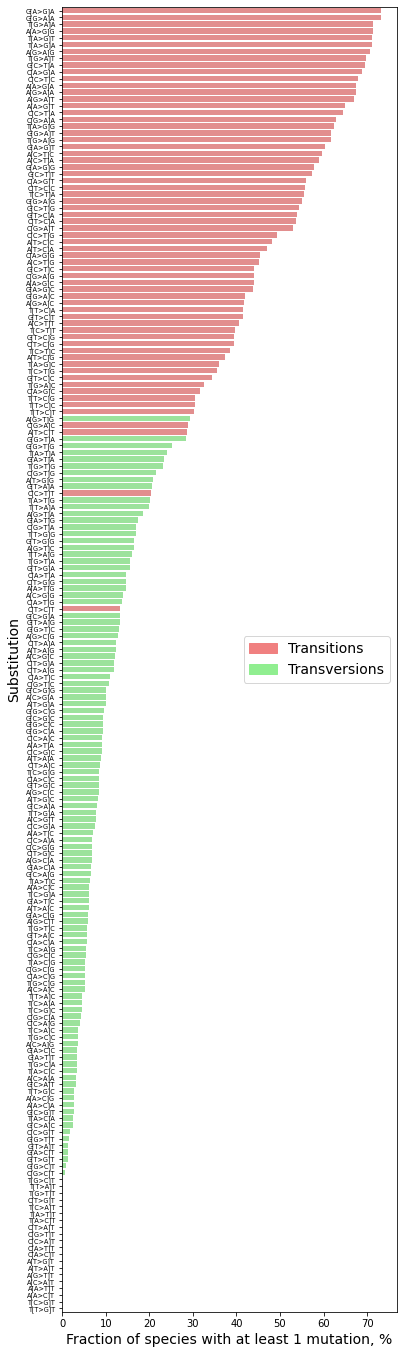

In [21]:
mcounts = mutspec.groupby("Mut").IsObserved.value_counts().rename("Count").reset_index().pivot('Mut','IsObserved', "Count").fillna(0).sort_values(False)
mcounts[False] = mcounts[False].astype("int")
mcounts[True] = mcounts[True].astype("int")
mcounts.columns.name = None
mcounts["Abundance"] = mcounts[True] / (mcounts[True] + mcounts[False]) * 100


clr1 = "lightcoral"
clr2 = "lightgreen"
mcounts["Color"] = [clr1 if x[2:5] in ['A>G', 'C>T', 'G>A', 'T>C'] else clr2 for x in mcounts.index.values]


patch1 = mpatches.Patch(color=clr1, label='Transitions')
patch2 = mpatches.Patch(color=clr2, label='Transversions')

plt.figure(figsize=(6, 24))
ax = sns.barplot(data=mcounts, y=mcounts.index, x="Abundance", 
            palette=mcounts.Color,
)
plt.yticks(rotation=0, fontsize=6.5)
plt.xlabel("Fraction of species with at least 1 mutation, %", fontsize=14)
plt.ylabel("Substitution", fontsize=14)
ax.legend(loc='center right', handles=[patch1, patch2], fontsize=14)
plt.savefig("../ToPaper/SupplementaryFigure3.pdf", bbox_inches='tight')
plt.show()

Text(381.25000000000006, 0.5, '')

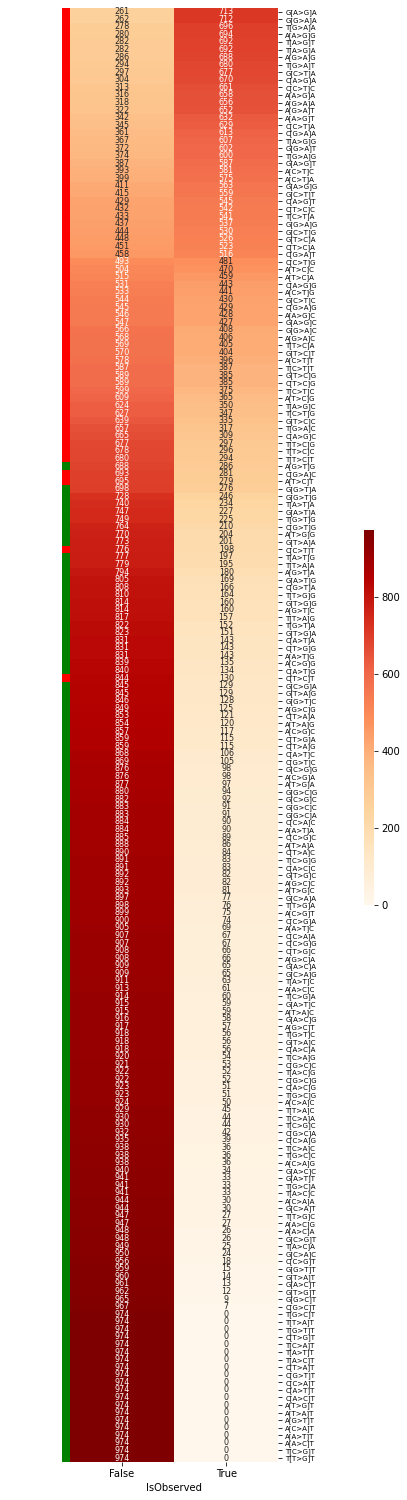

In [85]:
mcounts = mutspec.groupby("Mut").IsObserved.value_counts().rename("Count").reset_index().pivot('Mut','IsObserved', "Count").fillna(0).sort_values(False)
mcounts[False] = mcounts[False].astype("int")
mcounts[True] = mcounts[True].astype("int")

grd = sns.clustermap(
    data=mcounts,
    cmap="OrRd",
    figsize=(5, 26),
    col_cluster=False, row_cluster=False,
    cbar_pos=(1.02, .32, .03, .2),
    yticklabels=mcounts.index,
    annot=True,
    fmt=".0f",
    annot_kws={'fontsize': 8},
    row_colors=pd.Series(mcounts.index).apply(lambda x: "red" if x[2:5] in ['A>G', 'C>T', 'G>A', 'T>C'] else "green").values
)
plt.setp(grd.ax_heatmap.get_yticklabels(), size=7,)
grd.ax_col_dendrogram.remove()
grd.ax_heatmap.set_ylabel("")
# grd.ax_heatmap.set_xlabel("Number of species")
# grd.savefig("../pictures/sbs_counts.pdf")

## Complementary sbs

In [5]:
mutspec["sbs96"] = mutspec["Mut"].apply(lambda sbs: sbs if sbs[2:5] in {"C>A", "C>G", "C>T", "T>A", "T>C", "T>G"} else rev_comp(sbs))
mutspec["is_cosmic"] = mutspec["Mut"].apply(lambda sbs: sbs[2:5] in {"C>A", "C>G", "C>T", "T>A", "T>C", "T>G"})

In [6]:
mutspec

,Species,Mut,Expected,Observed,RawMutSpec,RawMutSpecSum,MutSpec,MutBase,Context,Class,sbs96,is_cosmic
0,Abbottina_obtusirostris,T[T>G]T,0.0,0.0,0.0,1.088889,0.000000,T>G,TTT,Actinopterygii,T[T>G]T,True
1,Abbottina_obtusirostris,G[T>G]T,0.0,0.0,0.0,1.088889,0.000000,T>G,GTT,Actinopterygii,G[T>G]T,True
2,Abbottina_obtusirostris,C[T>G]T,0.0,0.0,0.0,1.088889,0.000000,T>G,CTT,Actinopterygii,C[T>G]T,True
3,Abbottina_obtusirostris,A[T>G]T,0.0,0.0,0.0,1.088889,0.000000,T>G,ATT,Actinopterygii,A[T>G]T,True
4,Abbottina_obtusirostris,T[T>C]T,8.0,0.0,0.0,1.088889,0.000000,T>C,TTT,Actinopterygii,T[T>C]T,True
...,...,...,...,...,...,...,...,...,...,...,...,...
187003,Zosterops_japonicus,A[A>G]A,3.0,3.0,1.0,15.981840,0.062571,A>G,AAA,Aves,T[T>C]T,False
187004,Zosterops_japonicus,T[A>C]A,1.0,0.0,0.0,15.981840,0.000000,A>C,TAA,Aves,T[T>G]A,False
187005,Zosterops_japonicus,G[A>C]A,5.0,0.0,0.0,15.981840,0.000000,A>C,GAA,Aves,T[T>G]C,False
187006,Zosterops_japonicus,C[A>C]A,4.0,0.0,0.0,15.981840,0.000000,A>C,CAA,Aves,T[T>G]G,False


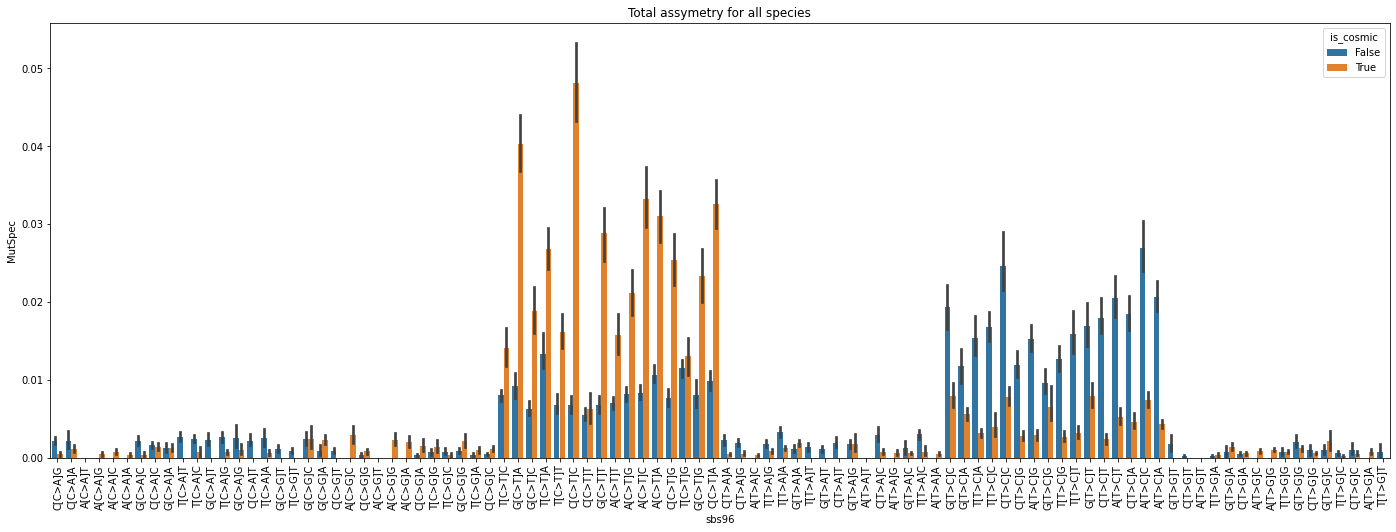

In [9]:
plt.figure(figsize=(24, 8))
sns.barplot(data=mutspec, x="sbs96", y="MutSpec", hue="is_cosmic", order=_d.sbs96.values)
plt.xticks(rotation=90)
plt.title("Total assymetry for all species")
plt.savefig("../pictures/sbs_assymetry_barplot.pdf")
plt.show()

In [12]:
mutspec[(mutspec.Species == "Abbottina_obtusirostris") & (mutspec.sbs96 == "T[T>G]T")]

,Species,Mut,Expected,Observed,RawMutSpec,RawMutSpecSum,MutSpec,MutBase,Context,Class,sbs96,is_cosmic
0,Abbottina_obtusirostris,T[T>G]T,0.0,0.0,0.0,1.088889,0.0,T>G,TTT,Actinopterygii,T[T>G]T,True
191,Abbottina_obtusirostris,A[A>C]A,2.0,0.0,0.0,1.088889,0.0,A>C,AAA,Actinopterygii,T[T>G]T,False
